<a href="https://colab.research.google.com/github/rifatkhan545/Time-series-Analysis/blob/main/Autoregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [8]:
!pip install statsmodels --upgrade

In [12]:
from statsmodels.tsa.ar_model import AutoReg

import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("/content/sample_data/MaunaLoaDailyTemps.csv",index_col=0, parse_dates= True)

In [18]:
df


,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758
...,...,...,...,...,...
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753


In [19]:
X = df['AvgTemp'].values

In [20]:
X

array([40., 43., 41., ..., 40., 42., 46.])

In [23]:
df.shape

(1825, 5)

Check Stationarity

<Axes: xlabel='DATE'>

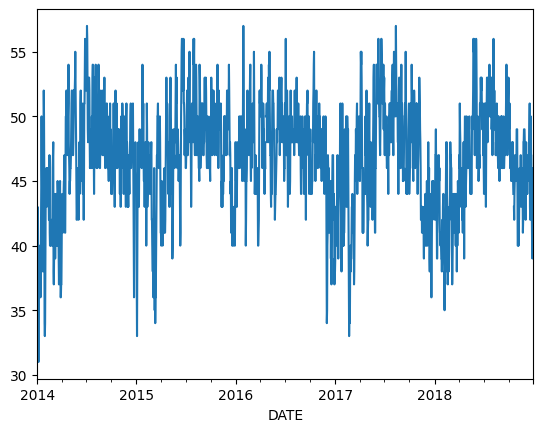

In [24]:
df['AvgTemp'].plot()

In [25]:
from statsmodels.tsa.stattools import adfuller

In [34]:
dtest = adfuller(df['AvgTemp'],autolag='AIC')

In [28]:
df['AvgTemp'].isnull().values.any()

True

In [31]:
df['AvgTemp'].describe()

,AvgTemp
count,1821.000000
mean,46.818781
std,4.143192
min,31.000000
25%,44.000000
50%,47.000000
75%,50.000000
max,57.000000


In [32]:
df["AvgTemp"].fillna(df["AvgTemp"].mean(),inplace=True)

In [33]:
df['AvgTemp'].isnull().values.any()

False

In [35]:
p_value = dtest[1]

In [36]:
p_value

6.977825912591916e-09

So, its stationary. If its non stationary its hould be more than 0.5

In [37]:
df1 = df['AvgTemp']

<Axes: xlabel='DATE'>

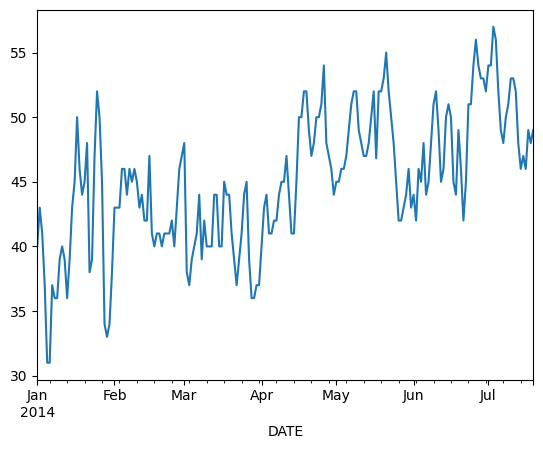

In [38]:
df1[:200].plot()

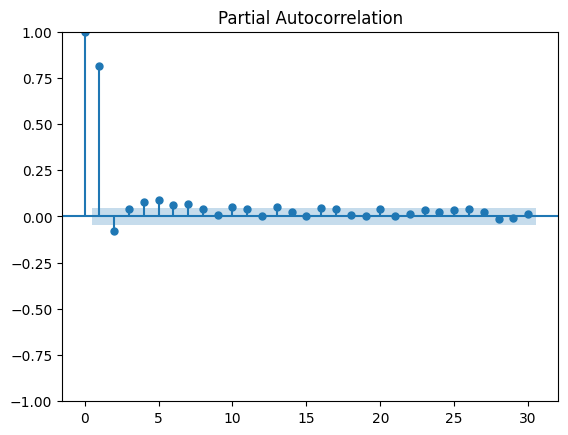

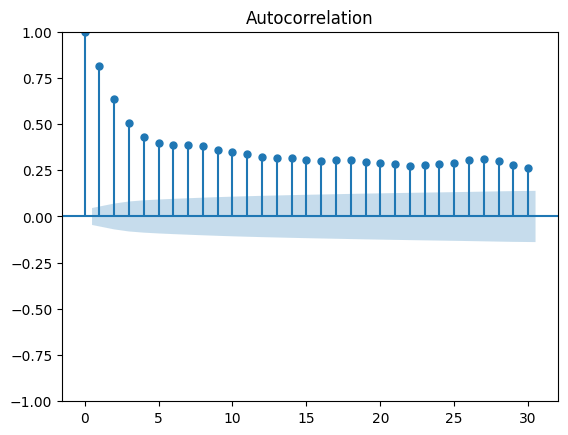

In [39]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
pacf = plot_pacf(df1,lags=30)
acf = plot_acf(df1,lags=30)

In [40]:
train= X[:len(X)-10]
test = X[len(X)-10:]

In [53]:
model = AutoReg(train,lags=10).fit()

In [54]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 1815
Model:                    AutoReg(10)   Log Likelihood               -4106.224
Method:               Conditional MLE   S.D. of innovations              2.354
Date:                Thu, 01 Aug 2024   AIC                           8236.449
Time:                        20:08:43   BIC                           8302.429
Sample:                            10   HQIC                          8260.801
                                 1815                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1862      0.836      7.396      0.000       4.547       7.826
y.L1           0.8459      0.024     35.947      0.000       0.800       0.892
y.L2          -0.1017      0.031     -3.300      0.0

Prediction on testset and comparison

In [55]:
prediction = model.predict(start=len(train),end=len(X)-1,dynamic=False)

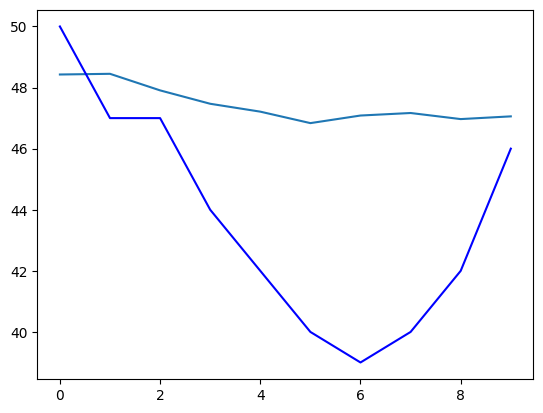

In [56]:
plt.plot(prediction)
plt.plot(test,color ='blue')


In [57]:
prediction

array([48.42781952, 48.45042154, 47.90778364, 47.46972596, 47.2115112 ,
       46.83619523, 47.08458785, 47.16723485, 46.9682251 , 47.05714446])

In [58]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test,prediction))


In [59]:
rmse

4.83593412896525

Making Future Prediction

In [62]:
pred_f = model.predict(start=len(X)+1,end=len(X)+10,dynamic=False)

In [63]:
pred_f

array([47.16446656, 47.16492436, 47.12978864, 47.11126324, 47.07149435,
       47.04923271, 47.05161838, 47.04578753, 47.04457874, 47.04266064])